In [307]:
import pandas as pd
import numpy as np

# Problem Statement 

# to forecast the passengers infolow for next 12 months (for year 1961)

In [308]:
df=pd.read_csv("AirPassengers.csv")

In [309]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [310]:
df.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [311]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [312]:
# problem statement 
# to forcast the passenger infiow for next 12 months (for year 1961)

In [313]:
df=pd.read_csv("AirPassengers.csv", index_col='Month',parse_dates=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [314]:
df = df.rename(columns = {"#Passengers":"Passengers"})

In [315]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [316]:
df.tail()

,Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [317]:
df.shape

(144, 1)

# Visualizing the Time Series plot for the number of Air Passengers

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

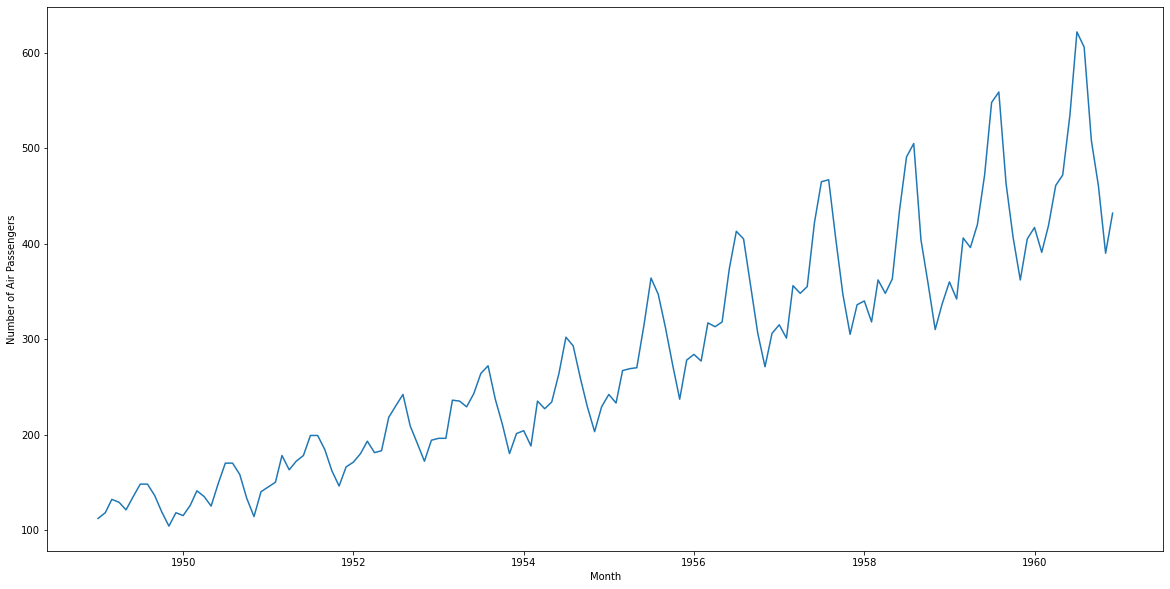

In [318]:
plt.figure(figsize=(20,10))
plt.xlabel("Month")
plt.ylabel("Number of Air Passengers")
plt.plot(df)
plt.show()

In [319]:
df.diff()

,Passengers
Month,
1949-01-01,NaN
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
...,...
1960-08-01,-16.0
1960-09-01,-98.0
1960-10-01,-47.0


In [320]:
# convert to the stationary 
# first level diffrencing 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

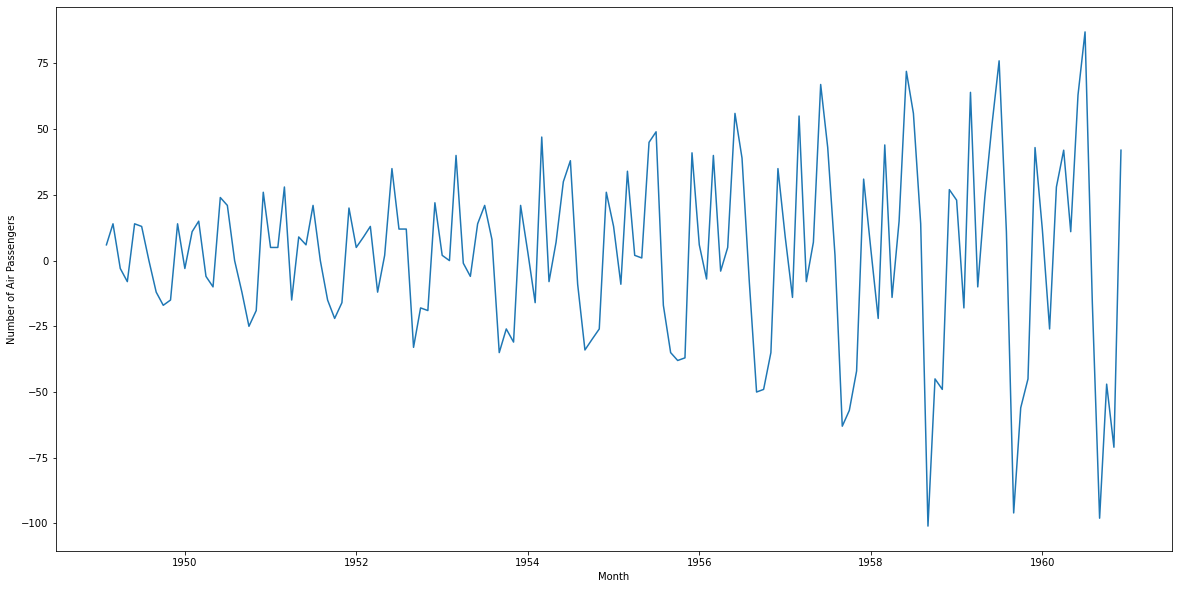

In [321]:
plt.figure(figsize=(20,10))
plt.xlabel("Month")
plt.ylabel("Number of Air Passengers")
plt.plot(df.diff())

In [322]:
# second level diff

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

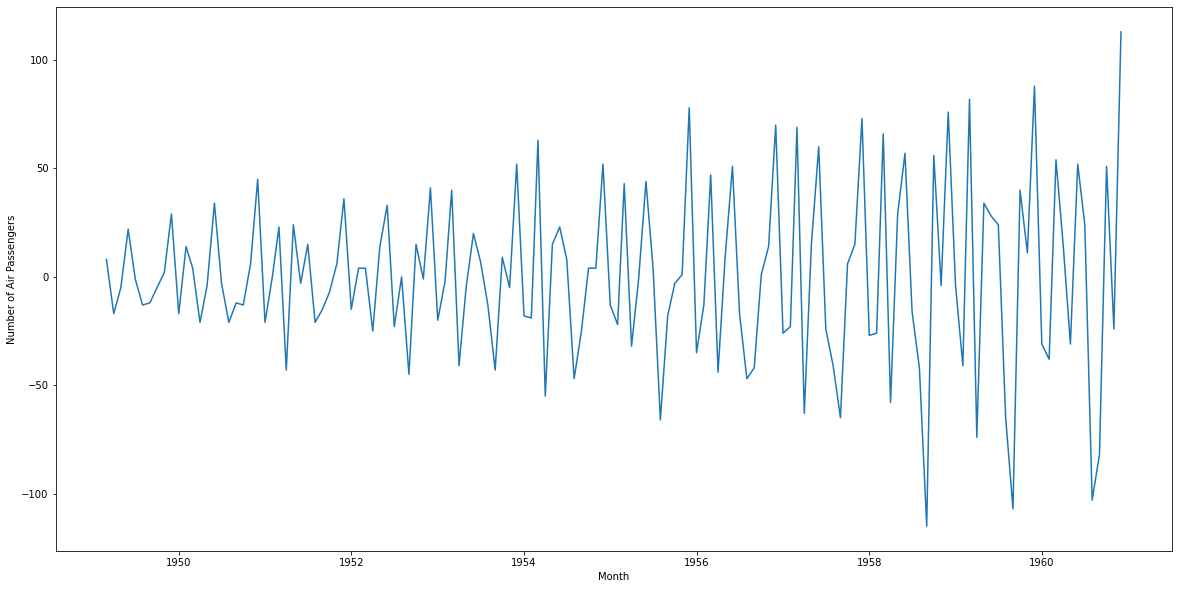

In [323]:
plt.figure(figsize=(20,10))
plt.xlabel("Month")
plt.ylabel("Number of Air Passengers")
plt.plot(df.diff().diff())

In [324]:
# third level of differncing

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

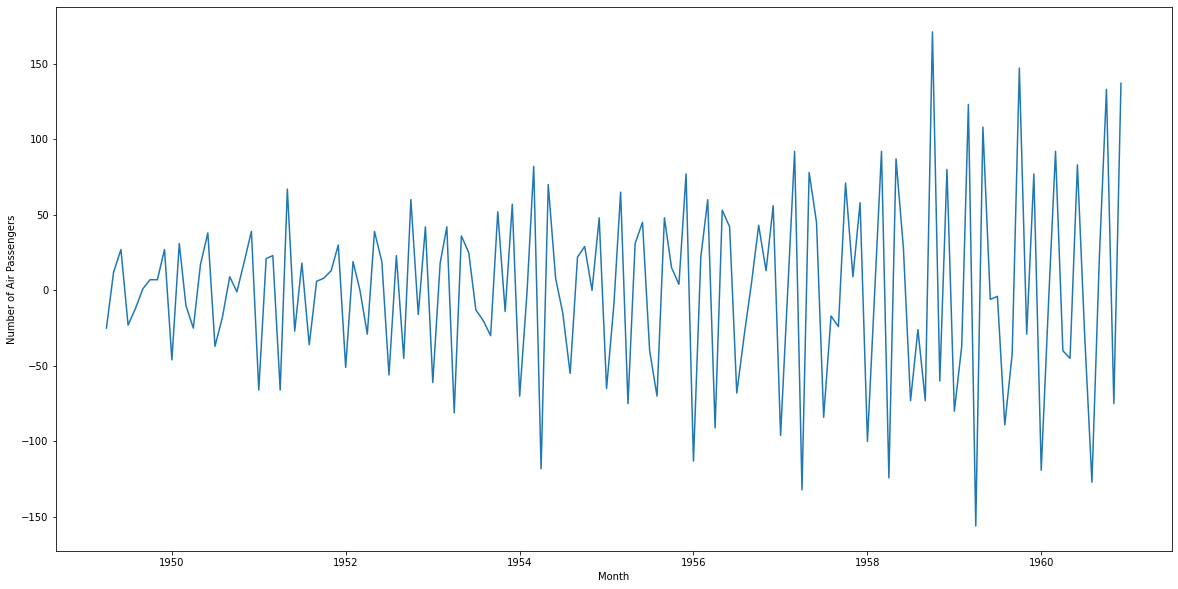

In [325]:
plt.figure(figsize=(20,10))
plt.xlabel("Month")
plt.ylabel("Number of Air Passengers")
plt.plot(df.diff().diff().diff())

In [326]:
# even after multiple level of diff series dose not become stationary

In [327]:
import numpy as np

<IPython.core.display.Javascript object>

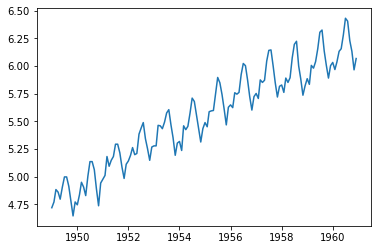

In [328]:
df_log=np.log(df)
plt.plot(df_log)

In [329]:
# after taking log take one level differncing 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

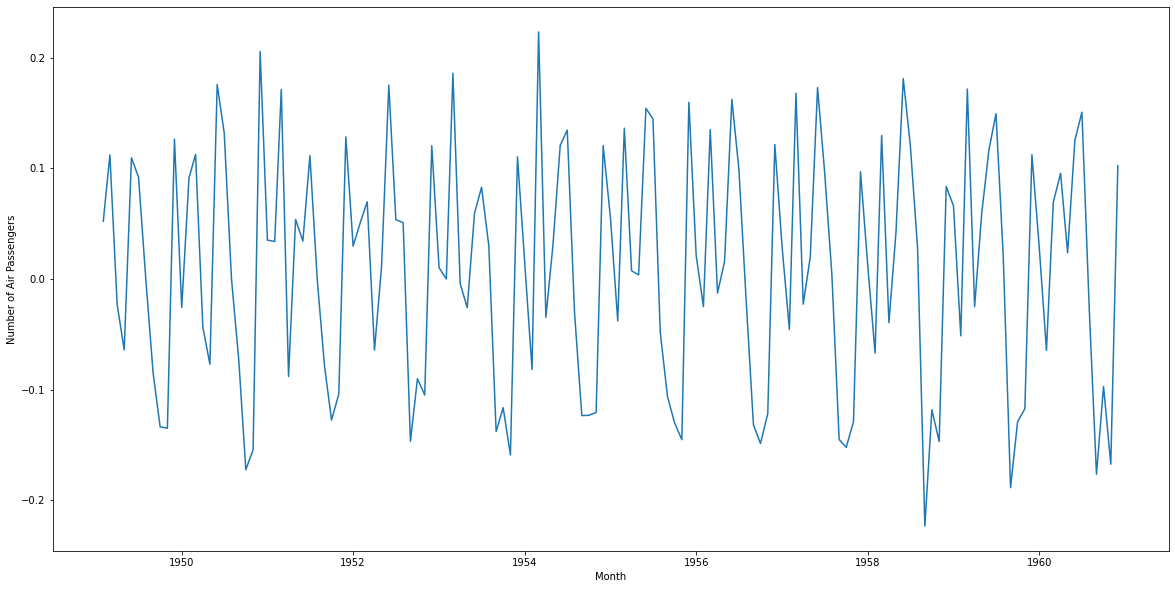

In [330]:
plt.figure(figsize=(20,10))
plt.xlabel("Month")
plt.ylabel("Number of Air Passengers")
plt.plot(df_log.diff())

In [331]:
df_log.mean()

Passengers    5.542176
dtype: float64

In [332]:
df_log

,Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


In [333]:
# so when do forcast,forcasting would also be in log 
# so we need to take anti log to get the data in same range (scale)

In [334]:
# for building the model we need to know 3 things(p,d,q)

In [335]:
# to find p and q lets use pcf and pacf

In [336]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

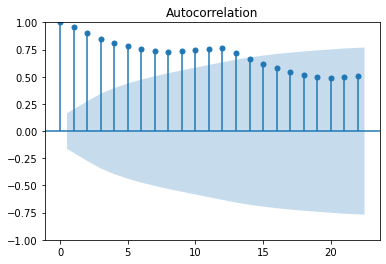

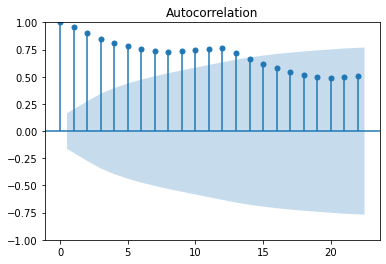

In [337]:
plot_acf(df_log.Passengers)

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


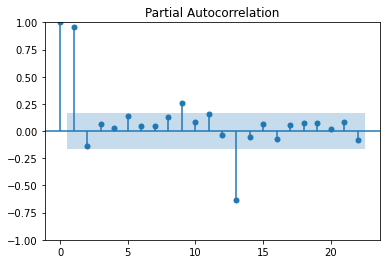

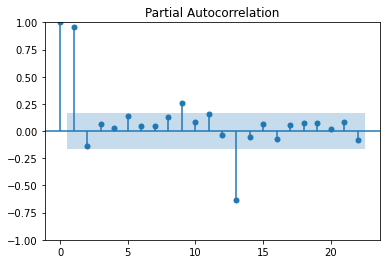

In [338]:
plot_pacf(df_log.Passengers)

In [339]:
from statsmodels.tsa.arima_model import ARIMA 
import statsmodels.api as sm

In [340]:
model=sm.tsa.arima.ARIMA(df_log,order=(2,1,3))

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [341]:
result=model.fit()

In [342]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(2, 1, 3)   Log Likelihood                 130.066
Date:                Sat, 24 Dec 2022   AIC                           -248.132
Time:                        11:01:16   BIC                           -230.355
Sample:                    01-01-1949   HQIC                          -240.908
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1265      0.452     -0.280      0.780      -1.012       0.759
ar.L2          0.4325      0.158      2.744      0.006       0.124       0.741
ma.L1          0.2983      0.476      0.626      0.531      -0.636       1.232
ma.L2         -0.7568      0.118     -6.404      0.000      -0.988      -0.525
ma.L3         -0.2157      0.271     -0.797      0.425      -0.746       0.315
sigma2         0.0095      0.002      5.763      0.000       0.006       0.013
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 7.12
Prob(Q):                              0.81   Prob(JB):                         0.03
Heteroskedasticity (H):               1.07   Skew:                            -0.01
Prob(H) (two-sided):                  0.82   Kurtosis:                         1.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [343]:
result.params

ar.L1    -0.126451
ar.L2     0.432452
ma.L1     0.298256
ma.L2    -0.756833
ma.L3    -0.215661
sigma2    0.009454
dtype: float64

In [344]:
# linear regression (slop and coeff)

In [345]:
forcast_value=result.forecast(steps=12) # xext 12 time period 

In [346]:
forcast_value

1961-01-01    6.158654
1961-02-01    6.133097
1961-03-01    6.148095
1961-04-01    6.135146
1961-05-01    6.143270
1961-06-01    6.136643
1961-07-01    6.140994
1961-08-01    6.137578
1961-09-01    6.139891
1961-10-01    6.138122
1961-11-01    6.139346
1961-12-01    6.138426
Freq: MS, Name: predicted_mean, dtype: float64

In [347]:
forcast_value[0]

6.158653545362465

In [348]:
forcasted_value=np.exp(forcast_value)
forcasted_value

1961-01-01    472.791054
1961-02-01    460.861076
1961-03-01    467.825370
1961-04-01    461.806692
1961-05-01    465.573448
1961-06-01    462.498335
1961-07-01    464.515046
1961-08-01    462.930966
1961-09-01    464.003222
1961-10-01    463.182750
1961-11-01    463.750170
1961-12-01    463.323637
Freq: MS, Name: predicted_mean, dtype: float64

In [349]:
# is the forcated values good or bad

In [350]:
# now lets plot the forcasted values and try to study them 

In [351]:
df1=pd.DataFrame()

In [352]:
df1['Predicted']=forcasted_value

In [353]:
df1

,Predicted
1961-01-01,472.791054
1961-02-01,460.861076
1961-03-01,467.825370
1961-04-01,461.806692
1961-05-01,465.573448
1961-06-01,462.498335
1961-07-01,464.515046
1961-08-01,462.930966
1961-09-01,464.003222
1961-10-01,463.182750


In [354]:
date_for_pred=['1961-01-01','1961-02-01','1961-03-01','1961-04-01','1961-05-01','1961-06-01','1961-07-01','1961-08-01',
               '1961-09-01','1961-10-01','1961-11-01','1961-12-01']

In [355]:
df1['Month']=date_for_pred

In [356]:
df1

,Predicted,Month
1961-01-01,472.791054,1961-01-01
1961-02-01,460.861076,1961-02-01
1961-03-01,467.825370,1961-03-01
1961-04-01,461.806692,1961-04-01
1961-05-01,465.573448,1961-05-01
1961-06-01,462.498335,1961-06-01
1961-07-01,464.515046,1961-07-01
1961-08-01,462.930966,1961-08-01
1961-09-01,464.003222,1961-09-01
1961-10-01,463.182750,1961-10-01


In [357]:
df1=df1.set_index(['Month'])

In [358]:
df1

,Predicted
Month,
1961-01-01,472.791054
1961-02-01,460.861076
1961-03-01,467.825370
1961-04-01,461.806692
1961-05-01,465.573448
1961-06-01,462.498335
1961-07-01,464.515046
1961-08-01,462.930966
1961-09-01,464.003222


<AxesSubplot:xlabel='Month'>

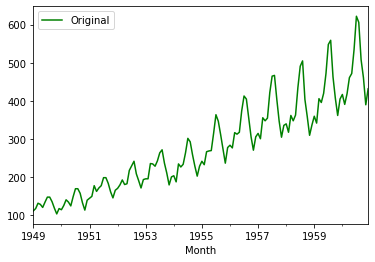

In [360]:
df['Passengers'].plot(legend=True,label='Original',color='green')


<AxesSubplot:xlabel='Month'>

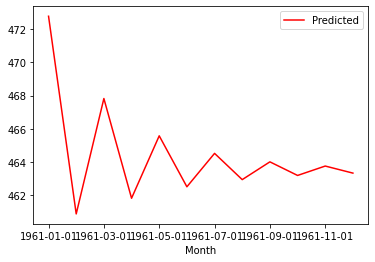

In [361]:
df1['Predicted'].plot(legend=True,label='Predicted',color='red')

In [363]:
# probelm associted with arima (it can not handle sesonality)
# Sarima
# Sarimax 
# tomm (sequntial sampling),build model train,test on test(camapare forcasted and actual values msr mape mae 

In [364]:
# how to use SARIMA  ...we will use auto_arima (and what ever values we get from auto_arima )
# just pass them sarima 

In [365]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
import pmdarima
from pmdarima import auto_arima

In [367]:
result=seasonal_decompose(df_log)

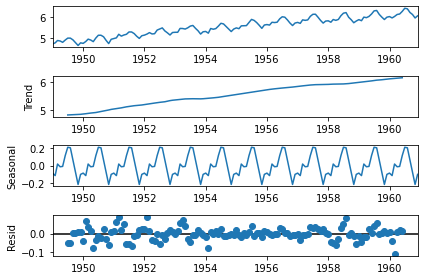

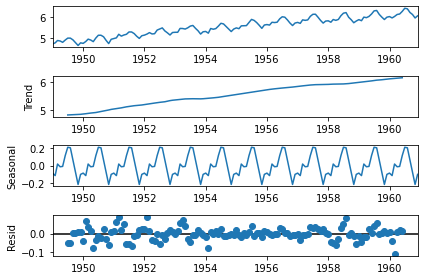

In [370]:
result.plot()
# this plot is just to get the idea about your data 

In [371]:
auto_arima(df_log,seasonal=True , m=12)

ARIMA(order=(2, 0, 0), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True)

In [373]:
# order=(2,0,0), p,d,q
# seasonal_prder=(0,1,1,12) p,d,q,seasonal

In [374]:
# what ever value u get from auto arima pass them in sarima 

In [375]:
model_sarima=SARIMAX(df_log,order=(2, 0, 0),seasonal_order=(0, 1, 1, 12))

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [376]:
airpas_model=model_sarima.fit()

In [390]:
pred_values=airpas_model.predict(start=144,end=155)
pred_values

1961-01-01    6.103776
1961-02-01    6.045674
1961-03-01    6.162247
1961-04-01    6.188751
1961-05-01    6.220758
1961-06-01    6.355634
1961-07-01    6.492973
1961-08-01    6.487279
1961-09-01    6.307734
1961-10-01    6.190873
1961-11-01    6.044043
1961-12-01    6.147318
Freq: MS, Name: predicted_mean, dtype: float64

In [391]:
pred_values1=np.exp(pred_values)

In [392]:
pred_values1.round()

1961-01-01    448.0
1961-02-01    422.0
1961-03-01    474.0
1961-04-01    487.0
1961-05-01    503.0
1961-06-01    576.0
1961-07-01    660.0
1961-08-01    657.0
1961-09-01    549.0
1961-10-01    488.0
1961-11-01    422.0
1961-12-01    467.0
Freq: MS, Name: predicted_mean, dtype: float64

In [399]:
df2=pd.DataFrame()
df2['Predicted']=pred_values1
date_of_pred=['1961-01-01','1961-02-01','1961-03-01',
              '1961-04-01','1961-05-01','1961-06-01',
              '1961-07-01','1961-08-01',
               '1961-09-01','1961-10-01',
              '1961-11-01','1961-12-01']

In [400]:
df2["Month"]=date_of_pred
df2.Month=pd.to_datetime(df2.Month,infer_datetime_format=True)

df2=df2.set_index(['Month'])

<AxesSubplot:xlabel='Month'>

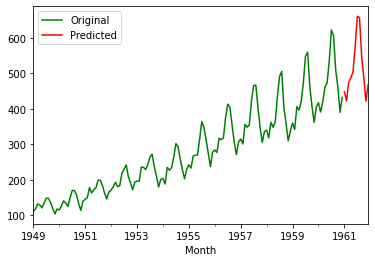

In [403]:
df['Passengers'].plot(legend=True,label='Original',color='green')
df2['Predicted'].plot(legend=True,label='Predicted',color='red')